# Data sampling

Samples the dataset based on project prominence.

## Dataset loading

In [1]:
import pandas as pd
import python_proj.utils.exp_utils as exp_utils

data_file_name = "dataset_with_constructed"

data_path_format = exp_utils.BASE_PATH + "/final_data/{data_file_name}.csv"
data_path = data_path_format.format(data_file_name=data_file_name)
print(f"{data_path=}")

df: pd.DataFrame = pd.read_csv(filepath_or_buffer=data_path, header=0)

figure_base_path = f"{exp_utils.BASE_PATH}/figures/modelling/{data_file_name}/"
print(f"{figure_base_path=}")

print(f"{len(df)=}.")
print(f"{len(df.columns)=}\n")

df.describe()

data_path='/workspaces/msc_thesis/data//final_data/dataset_with_constructed.csv'
figure_base_path='/workspaces/msc_thesis/data//figures/modelling/dataset_with_constructed/'
len(df)=1815972.
len(df.columns)=43



,ID,Submitter ID,PR Number,ControlPullRequestLifeTimeInMinutes,ControlNumberOfCommitsInPullRequest,ControlIntraProjectPullRequestExperienceOfIntegrator,IntraProjectSubmitterPullRequestSubmissionCount,IntraProjectSubmitterPullRequestSuccessRate,IntraProjectSubmitterPullRequestCommentCount,EcosystemExperienceSubmitterPullRequestSuccessRate,...,DependencyEcosystemExperienceSubmitterIssueSubmissionCount,DependencyEcosystemExperienceSubmitterIssueCommentCount,NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount,NonDependencyEcosystemExperienceSubmitterIssueCommentCount,InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount,InversedDependencyEcosystemExperienceSubmitterIssueCommentCount,WeightedEcosystemSecondOrderDegreeCentrality,WeightedIntraProjectSecondOrderDegreeCentrality,EcosystemLinkIntensity,IntraProjectLinkIntensity
count,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,...,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06
mean,1.474751e+08,5.198276e+06,3.807207e+03,3.190111e+04,4.947501e+00,1.932087e+02,1.679350e+01,5.352468e-01,2.170048e+01,3.702776e-01,...,1.743463e-01,8.645552e-01,2.274088e+00,1.570265e+01,1.854588e-01,1.355166e+00,2.296422e+01,7.815218e+01,8.608194e-01,4.332911e+00
std,1.004294e+08,8.100370e+06,8.071615e+03,1.399335e+05,7.283362e+01,4.827151e+02,5.548605e+01,4.623260e-01,6.563799e+01,4.472133e-01,...,1.580686e+00,1.186131e+01,7.064174e+00,6.131080e+01,2.446396e+00,1.667164e+01,1.037335e+03,3.696540e+03,8.019720e+00,3.575078e+01
min,6.870000e+02,1.000000e+00,1.000000e+00,1.666667e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.807322e+07,4.631570e+05,1.000000e+02,5.290000e+01,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.371940e+08,1.620265e+06,5.480000e+02,9.799167e+02,1.000000e+00,3.000000e+01,2.000000e+00,8.000000e-01,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.503077e-01,0.000000e+00,0.000000e+00
75%,2.278026e+08,6.384100e+06,2.817000e+03,7.328350e+03,3.000000e+00,1.410000e+02,1.700000e+01,1.000000e+00,1.500000e+01,9.186047e-01,...,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.870552e+00,4.883533e+00,0.000000e+00,4.910620e-01
max,3.617756e+08,5.976123e+07,8.297600e+04,4.489490e+06,1.000000e+04,4.281000e+03,1.703000e+03,1.000000e+00,2.038000e+03,1.000000e+00,...,3.730000e+02,9.270000e+02,2.332000e+03,7.630000e+03,7.410000e+02,2.764000e+03,5.534965e+05,2.524147e+06,9.048289e+02,5.249874e+03


In [2]:
vc = df[['SubmitterIsFirstTimeContributor']].value_counts()
newcomer_ratio = vc[1] / vc.sum()
print(vc)
print(f'{newcomer_ratio*100=:.3f}%')

SubmitterIsFirstTimeContributor
False                              1280574
True                                535398
Name: count, dtype: int64
newcomer_ratio*100=29.483%


## Visualization PRs over time

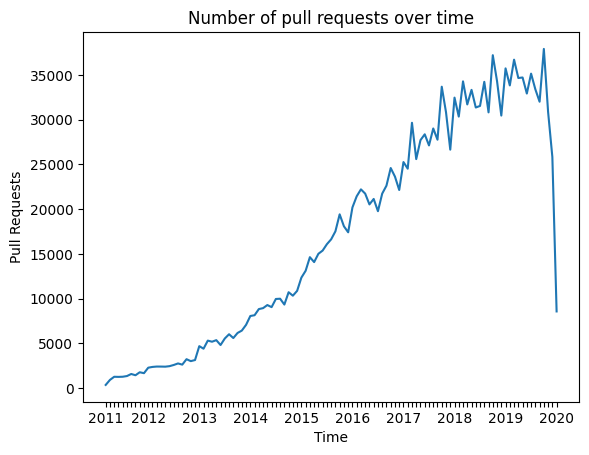

In [3]:
from python_proj.utils.util import safe_save_fig
import pandas as pd
import matplotlib.pyplot as plt

is_obfuscated_data = (df["Closed At"] == 0).all()

# This step can only be performed with non-obfuscated data.
if not is_obfuscated_data:
    dates = pd.to_datetime(df["Closed At"], format="%Y-%m-%dT%H:%M:%SZ")

    pr_count_per_year_month = dates.groupby([dates.dt.year, dates.dt.month]).count()
    axs = pr_count_per_year_month.plot(kind="line")

    # Fixes x-ticks to be less cluttered.
    xticks_years = []
    last_year = -1
    for year, _ in pr_count_per_year_month.keys():
        if last_year != year:
            last_year = year
            xticks_years.append(year)
        else:
            xticks_years.append("")
    axs.set_xticks(range(len(xticks_years)))
    axs.set_xticklabels(xticks_years)

    axs.set_xlabel("Time")
    axs.set_ylabel("Pull Requests")
    axs.set_title("Number of pull requests over time")

    output_path = f"{figure_base_path}/demographics/pr_count_per_year_month.png"
    safe_save_fig(output_path)

    plt.show()

## PRs per project

percentile=98
percentile_index=19650
Top project count: 402
Pull Requests below 98th percentile: 939645/1815972 (51.743%)



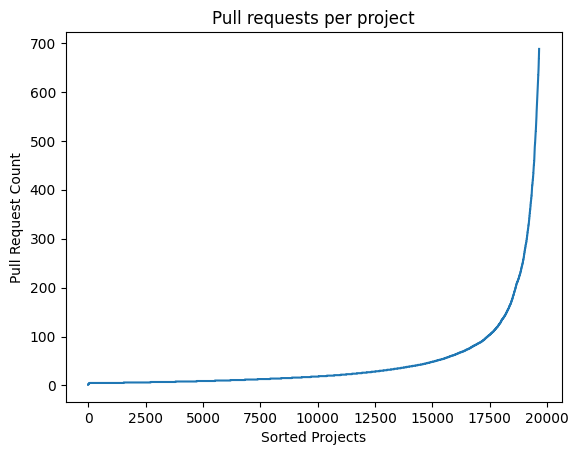

In [4]:
import math
import matplotlib.pyplot as plt


def __plot(__df, figure_name: str):
    plt.clf()
    axs = __df.plot(kind="line", use_index=False)
    axs.set_xlabel("Sorted Projects")
    axs.set_ylabel("Pull Request Count")
    axs.set_title("Pull requests per project")
    output_path = f"{figure_base_path}/demographics/{figure_name}.png"
    safe_save_fig(output_path)


# all data plot
pr_count_per_project = df['Project Name'].groupby(df["Project Name"]).count()
pr_count_per_project = pr_count_per_project.sort_values()
__plot(pr_count_per_project, "prs_per_project_all")

# up to 97th Percentile plot
project_count = len(pr_count_per_project)
# NOTE: with the 74th percentile the PR counts of the capped
# elite and the rest are approximately equal. The total number
# of entries is then 479.801.
percentile = 98
print(f"{percentile=}")
percentile_index = math.floor(project_count * percentile / 100)
print(f"{percentile_index=}")
print(f"Top project count: {project_count - percentile_index}")
perc_data = pr_count_per_project.iloc[:percentile_index]
__plot(perc_data, f"prs_per_project_up_to_{percentile}th_percentile")

# Printing some stats.
total_pull_count = sum(pr_count_per_project.values)
bottom_pull_count = sum(perc_data.values)
ratio = 100 * bottom_pull_count / total_pull_count
print(
    f"Pull Requests below {percentile}th percentile: {bottom_pull_count}/{total_pull_count} ({ratio:.03f}%)\n"
)

In [5]:
# Calculates cap

maximum_pulls = max(perc_data.values)
capped_top_pulls_count = maximum_pulls * (project_count - percentile_index)

print(f"{maximum_pulls=}")
print(f"{capped_top_pulls_count=}")
print(f"{bottom_pull_count + capped_top_pulls_count=}")

maximum_pulls=688
capped_top_pulls_count=276576
bottom_pull_count + capped_top_pulls_count=1216221


In [46]:
# Test representativeness of the sample size

z = 1.96**2
e = 0.05**2


def n(N, S):
    t = z * S ** 2
    b = (e + t / N)
    n = t / b
    return n


my_df = df.groupby("Project Name")
my_proj_pull_count = my_df['ID'].count()
my_pull_merged_vc = my_df['PullRequestIsMerged'].value_counts(normalize=True)

required_samples = list()
for _, (project, pull_count) in my_proj_pull_count.reset_index().iterrows():
    if pull_count <= maximum_pulls:
        continue
    perc = my_pull_merged_vc[project][True]
    var = perc * (1-perc)
    s = n(pull_count, var)
    s = int(math.ceil(s))
    required_samples.append(s)

# print(required_samples)

min_s = min(required_samples)
max_s = max(required_samples)


print(f'{min_s=}, {max_s=}')
# max(my_proj_pull_count)
# len(required_samples)

min_s=0, max_s=95


In [48]:
s = 0.787
ds = 445000
math.ceil(n(ds, s))

950

## PRs per project subsampling

Samples projects based on the calculated PR cap.

In [8]:
from wmutils.general import Counter

sampling_seed_counter = Counter()


def sample_with_maximum(project_subset: pd.DataFrame, max_sample_size: int):
    """Randomly samples the group if its number of elements exceed the provided cap."""
    if len(project_subset) > max_sample_size:
        seed = sampling_seed_counter.get_next()
        return project_subset.sample(max_sample_size, random_state=seed)
    return project_subset


# Samples top projects with the PR cap.
df = df.groupby("Project Name").apply(
    sample_with_maximum, max_sample_size=maximum_pulls
)

print(f"Sub-sampled df length: {len(df)}")

Sub-sampled df length: 1216221


## Dataset save to file

In [7]:
output_data_file_name = "dataset_subsampled"
output_path = data_path_format.format(data_file_name=output_data_file_name)
print(f"Outputting to '{output_path}'")

df.to_csv(output_path, index=False)

df.describe()

Outputting to '/workspaces/msc_thesis/data/final_data/dataset_subsampled.csv'


,ID,Submitter ID,PR Number,ControlPullRequestLifeTimeInMinutes,ControlNumberOfCommitsInPullRequest,ControlIntraProjectPullRequestExperienceOfIntegrator,IntraProjectSubmitterPullRequestSubmissionCount,IntraProjectSubmitterPullRequestSuccessRate,IntraProjectSubmitterPullRequestCommentCount,EcosystemExperienceSubmitterPullRequestSuccessRate,...,DependencyEcosystemExperienceSubmitterIssueSubmissionCount,DependencyEcosystemExperienceSubmitterIssueCommentCount,NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount,NonDependencyEcosystemExperienceSubmitterIssueCommentCount,InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount,InversedDependencyEcosystemExperienceSubmitterIssueCommentCount,WeightedEcosystemSecondOrderDegreeCentrality,WeightedIntraProjectSecondOrderDegreeCentrality,EcosystemLinkIntensity,IntraProjectLinkIntensity
count,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,...,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06
mean,1.473092e+08,5.092504e+06,8.089130e+02,3.682084e+04,4.214399e+00,4.020850e+01,9.853376e+00,5.029367e-01,1.018656e+01,4.028501e-01,...,2.015900e-01,8.592304e-01,2.501620e+00,1.759048e+01,2.578898e-01,1.804803e+00,2.892860e+01,6.084022e+01,1.099021e+00,2.639473e+00
std,9.954409e+07,7.968202e+06,2.304617e+03,1.538598e+05,5.461975e+01,1.169190e+02,3.399695e+01,4.710606e-01,3.270153e+01,4.523397e-01,...,1.705789e+00,9.331199e+00,7.584065e+00,6.526040e+01,2.926212e+00,1.902319e+01,1.209489e+03,2.846961e+03,9.258315e+00,2.468806e+01
min,6.870000e+02,1.000000e+00,1.000000e+00,1.666667e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.924867e+07,4.674710e+05,5.000000e+01,3.691667e+01,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.366714e+08,1.633887e+06,1.990000e+02,8.967333e+02,1.000000e+00,1.100000e+01,1.000000e+00,6.800000e-01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.182791e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.260994e+08,6.254382e+06,6.840000e+02,8.006983e+03,3.000000e+00,3.800000e+01,9.000000e+00,1.000000e+00,7.000000e+00,9.391304e-01,...,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,2.699642e+00,2.679358e+00,0.000000e+00,2.475789e-01
max,3.617756e+08,5.973444e+07,8.297600e+04,4.489490e+06,1.000000e+04,4.260000e+03,1.702000e+03,1.000000e+00,1.820000e+03,1.000000e+00,...,3.730000e+02,9.270000e+02,2.332000e+03,7.630000e+03,7.410000e+02,2.764000e+03,5.534965e+05,2.524147e+06,9.048289e+02,5.249874e+03


In [8]:
import datetime

print(datetime.datetime.now())

2025-01-07 09:22:41.775049
